In [4]:
import pandas as pd
import colorcet as cc
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

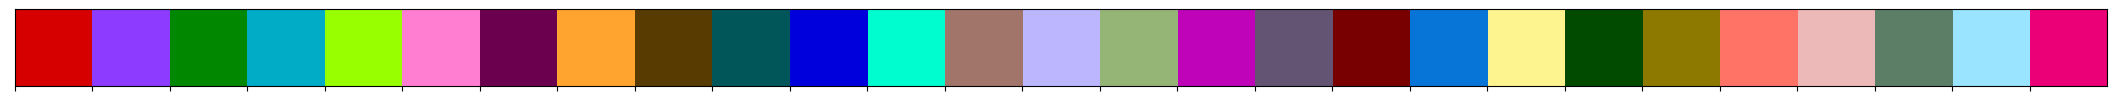

In [6]:
palette = sns.color_palette(cc.glasbey, n_colors=27)
sns.palplot(sns.color_palette(cc.glasbey, n_colors=27))

In [16]:
lo_losses = pd.read_csv("~/Desktop/a.csv", index_col=0)

In [19]:
patients = lo_losses.index.tolist()

In [20]:
gexp = pd.read_csv("../../data/GBM_Neftel/gbm_neftel_gexp.csv", index_col=[0,1])

In [27]:
gexp_orig = pd.read_csv("gbm_neftel_gexp_orig.csv", index_col=0)

In [22]:
pca = PCA(n_components=2)
pca.fit(gexp.apply(lambda x: np.log2(x+1)))

PCA(n_components=2)

In [38]:
#sns.choose_diverging_palette(as_cmap=False)
diverging_palette = sns.diverging_palette(116, 10, 99, as_cmap=True)

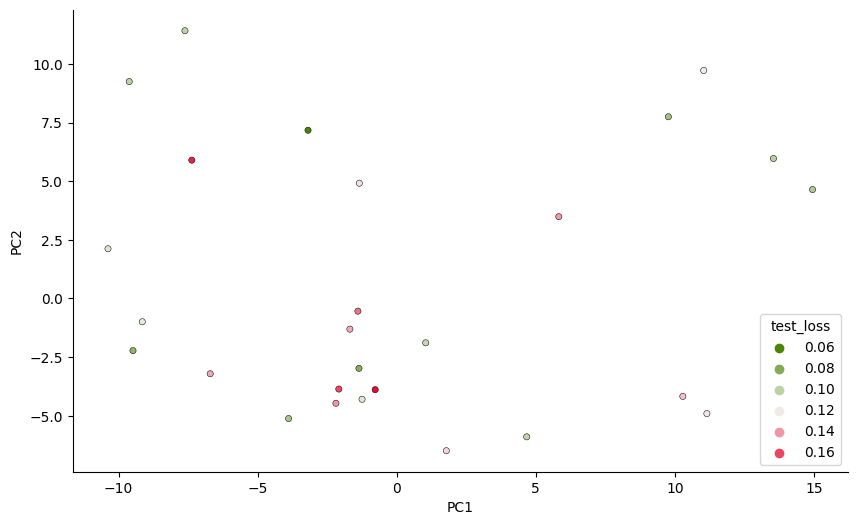

In [41]:
cmap = sns.diverging_palette(133, 10, as_cmap=True)

z = pca.transform(gexp_orig.apply(lambda x: np.log2(x+1)))
pc1, pc2 = zip(*z)
plt.figure(figsize=(10,6))
sns.scatterplot(x=pc1,y=pc2,hue=lo_losses["test_loss"],s=20, palette=diverging_palette, edgecolor="k")
xlim = plt.xlim()
ylim = plt.ylim()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

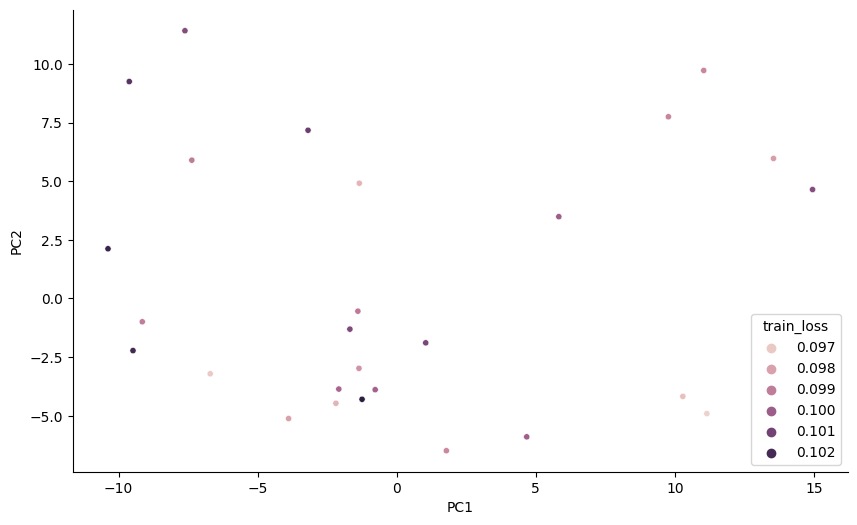

In [32]:
z = pca.transform(gexp_orig.apply(lambda x: np.log2(x+1)))
pc1, pc2 = zip(*z)
plt.figure(figsize=(10,6))
sns.scatterplot(x=pc1,y=pc2,hue=lo_losses["train_loss"],s=20)
xlim = plt.xlim()
ylim = plt.ylim()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Text(0.5, 1.0, 'Pseudopatient PCA in training set')

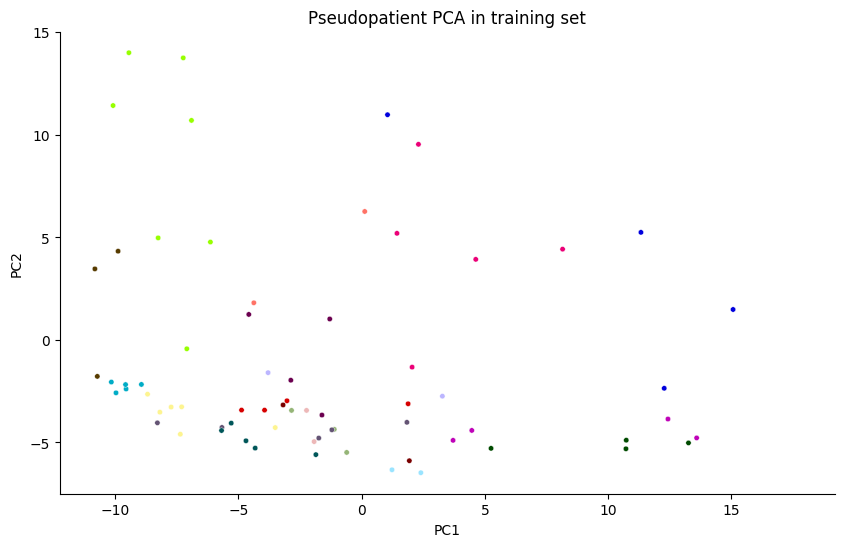

In [41]:
train_patients = ['MGH129', 'MGH128', 'BT1160', 'MGH104', 'BT85', 'MGH110', 'MGH66', 'MGH122', 'BT786', 'BT920', 'MGH115', 'BT771', 'MGH143', 'MGH151', 'MGH100', 'MGH136', 'MGH105', 'MGH121']
z = pca.transform(gexp.loc[train_patients].apply(lambda x: np.log2(x+1)))
pc1, pc2 = zip(*z)
plt.figure(figsize=(10,6))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
sns.scatterplot(x=pc1,y=pc2,hue=[a for (a,b) in gexp.loc[train_patients].index], hue_order=gexp.index.get_level_values(0).unique().tolist(), legend=False, palette=palette,s=15)
plt.title("Pseudopatient PCA in training set")

Text(0.5, 1.0, 'Pseudopatient PCA in test set')

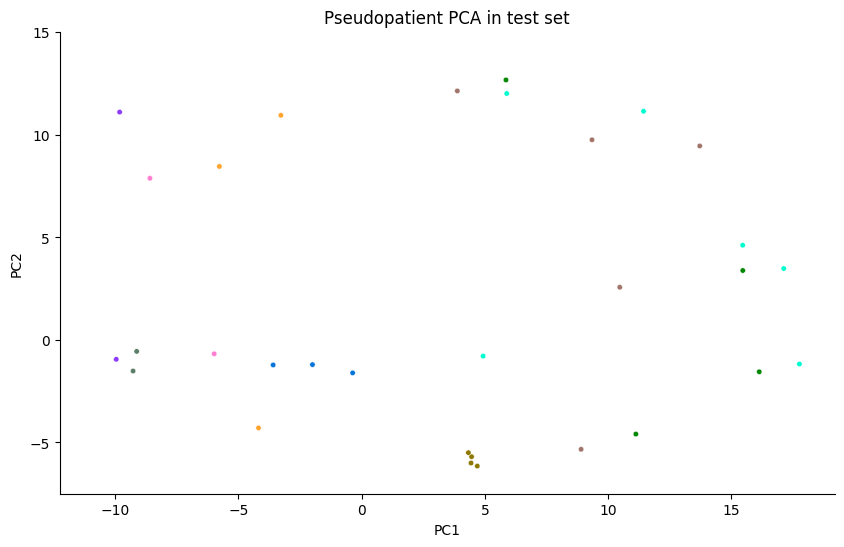

In [43]:
test_patients = ['MGH113', 'MGH106', 'MGH152', 'BT749', 'MGH124', 'MGH101', 'MGH102', 'MGH125', 'BT830']
z = pca.transform(gexp.loc[test_patients].apply(lambda x: np.log2(x+1)))
pc1, pc2 = zip(*z)
plt.figure(figsize=(10,6))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
sns.scatterplot(x=pc1,y=pc2,hue=[a for (a,b) in gexp.loc[test_patients].index],  hue_order=gexp.index.get_level_values(0).unique().tolist(), palette=palette,legend=False, s = 15)
plt.title("Pseudopatient PCA in test set")